# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [97]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [98]:
data=pd.read_csv("./data/WHO_COVID19_cases.csv")
data

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


In [99]:
country_selection=["Germany","France","Ukraine"]
filtered_data = data[data["Country"].isin(country_selection)]
filtered_data

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
17568,2020-01-05,FR,France,Europe,EURO,NaN,0,NaN,0
17569,2020-01-12,FR,France,Europe,EURO,NaN,0,NaN,0
17570,2020-01-19,FR,France,Europe,EURO,NaN,0,NaN,0
17571,2020-01-26,FR,France,Europe,EURO,3.0,3,NaN,0
17572,2020-02-02,FR,France,Europe,EURO,3.0,6,NaN,0
...,...,...,...,...,...,...,...,...,...
55383,2024-08-04,UA,Ukraine,Europe,EURO,171.0,5533093,NaN,109920
55384,2024-08-11,UA,Ukraine,Europe,EURO,275.0,5533368,3.0,109923
55385,2024-08-18,UA,Ukraine,Europe,EURO,439.0,5533807,NaN,109923
55386,2024-08-25,UA,Ukraine,Europe,EURO,1353.0,5535160,NaN,109923


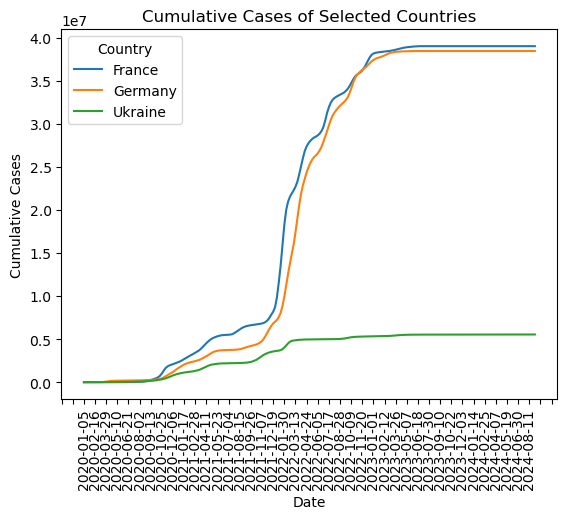

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x="Date_reported", y="Cumulative_cases", hue="Country", data=filtered_data)
plt.title("Cumulative Cases of Selected Countries")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.show()

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [127]:
import plotly.express as px
import plotly.io as pio
 
pio.renderers.default = 'notebook' 

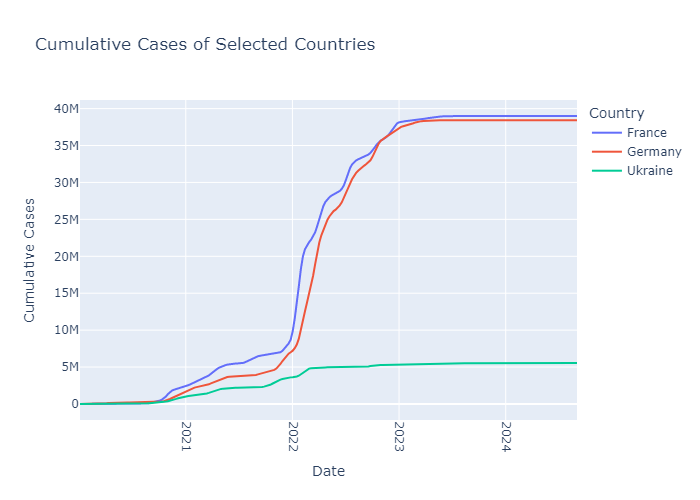

In [131]:
fig = px.line(filtered_data, 
              x="Date_reported", 
              y="Cumulative_cases", 
              color="Country", 
              title="Cumulative Cases of Selected Countries",
              labels={"Date_reported": "Date", "Cumulative_cases": "Cumulative Cases"})
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Cumulative Cases",
    xaxis_tickangle=90,
)
fig.show(renderer="png")